In [3]:
import os
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split #트레인과 테스트데이터 분리 시키는 패키지

In [4]:
# 현재경로 확인
os.getcwd()

'C:\\Users\\Younjiei\\Desktop\\패스트캠퍼스\\머신러닝&데이터분석\\2. [Machine Learning]\\PART 2) 회귀분석\\1. Jupyter Notebook ( Typing 용)'

./ 현재위치

../ 현재위치 상단폴더

In [5]:
# 데이터 불러오기
coralla=pd.read_csv("../3. 실습데이터/ToyotaCorolla.csv")
coralla

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


### id와model은 필요없는 변수 우리가 예측할것은 price

### 연료타입( fuel_type)은 명목형변수(durmmy variable)이므로 전처리 필요

In [6]:
# 데이터 수와 변수의 수 확인하기
ncar=coralla.shape[0] #행
nvar=coralla.shape[1] #열
print(ncar,nvar)

1436 37


## 범주형 변수를 이진형 변수로 변환

In [7]:

coralla.Fuel_Type.unique() #어떤 종류가 있는지 확인
#3개 factor가 있으니까 최소 2개 변수가 더필요 

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [8]:
## 가변수 생성
durmmy_a=np.repeat(0,ncar)
durmmy_b=np.repeat(0,ncar)
durmmy_c=np.repeat(0,ncar)

In [9]:
durmmy_a #1xncar(데이터수)짜리 행렬

array([0, 0, 0, ..., 0, 0, 0])

In [10]:
# 인덱스 슬라이싱 후 (binary = 1) 대입
a_index=np.array(coralla.Fuel_Type=='Petrol')
b_index=np.array(coralla.Fuel_Type=='Diesel')
c_index=np.array(coralla.Fuel_Type=='CNG')

In [11]:
a_index

array([False, False, False, ...,  True,  True,  True])

In [12]:
durmmy_a[a_index]=1
durmmy_b[b_index]=1
durmmy_c[c_index]=1
durmmy_b

array([1, 1, 1, ..., 0, 0, 0])

## 불필요한 변수 제거 및 가변수 추가


In [13]:
#pd.dataframe({'키':리스트형식값})
Fuel=pd.DataFrame({'Petrol':durmmy_a,'Disel':durmmy_b,'CNG':durmmy_c})


In [14]:
Fuel

,Petrol,Disel,CNG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,1,0,0
1432,1,0,0
1433,1,0,0
1434,1,0,0


In [15]:
#id,model,fuel_type변수 삭제
coralla_=coralla.drop(['Id','Model','Fuel_Type'],axis=1,inplace=False) #열방향으로 지우기 inplace=false는 복사본지움
#두개 데이터 프레임 병합
mlr_data=pd.concat([coralla_,Fuel],axis=1)
mlr_data

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Disel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,12,1998,20544,86,1,0,1300,3,...,0,1,1,1,0,0,0,1,0,0
1432,10845,72,9,1998,19000,86,0,0,1300,3,...,0,0,1,1,0,0,0,1,0,0
1433,8500,71,10,1998,17016,86,0,0,1300,3,...,0,0,0,1,0,0,0,1,0,0
1434,7250,70,11,1998,16916,86,1,0,1300,3,...,0,0,0,1,0,0,0,1,0,0


## 회기분석

In [16]:
# bias 추가 (상수항추가) const
mlr_data=sm.add_constant(mlr_data,has_constant="add")
mlr_data

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Disel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1.0,7500,69,12,1998,20544,86,1,0,1300,...,0,1,1,1,0,0,0,1,0,0
1432,1.0,10845,72,9,1998,19000,86,0,0,1300,...,0,0,1,1,0,0,0,1,0,0
1433,1.0,8500,71,10,1998,17016,86,0,0,1300,...,0,0,0,1,0,0,0,1,0,0
1434,1.0,7250,70,11,1998,16916,86,1,0,1300,...,0,0,0,1,0,0,0,1,0,0


## 설명변수(X), 타켓변수(Y) 분리 및 학습데이터와 평가데이터 분할

In [17]:
feature_columns=list(mlr_data.columns.difference(['Price'])) 
#price칼럼을 제외한 모든 칼럼 가져오기

In [18]:

X = mlr_data[feature_columns]
y = mlr_data.Price

#train과test데이터 분리
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 37) (431, 37) (1005,) (431,)


In [19]:
# Train the MLR / 회귀모델적합
mul_model=sm.OLS(train_y,train_x)
fit_model=mul_model.fit()

In [20]:
 ## R2가 높고, 대부분의 변수들이 유의(전체적(반 이상이)으로 p-value가 낮음)
fit_model.summary()
## airbag_1,met_color p-value쫌 높음 무의미

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     317.7
Date:                Wed, 03 Jun 2020   Prob (F-statistic):               0.00
Time:                        02:11:07   Log-Likelihood:                -8402.6
No. Observations:                1005   AIC:                         1.687e+04
Df Residuals:                     971   BIC:                         1.704e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -213.0729    137.237     -1.553      0.121    -482.388      56.242
Age_08_04         -114.9141      3.941    -29.159      0.000    -122.648    -107.180
Airbag_1           238.8787    265.606      0.899      0.369    -282.350     760.107
Airbag_2          -106.9895    136.817     -0.782      0.434    -375.480     161.501
Airco              249.0055     92.260      2.699      0.007      67.954     430.057
Automatic          514.8958    157.560      3.268      0.001     205.697     824.094
Automatic_airco   2470.6143    192.936     12.805      0.000    2091.994    2849.234
BOVAG_Guarantee    481.8333    126.931      3.796      0.000     232.743     730.924
Backseat_Divider  -238.7301    129.948     -1.837      0.066    -493.741      16.281
Boardcomputer     -266.0211    118.538     -2.244      0.025    -498.641     -33.401
CD_Player          268.4761    100.907      2.661      0.008      70.455     466.497
CNG              -1466.6035    270.528     -5.421      0.000   -1997.491    -935.716
Central_Lock      -252.5620    144.579     -1.747      0.081    -536.285      31.161
Cylinders           -0.0264      0.002    -11.438      0.000      -0.031      -0.022
Disel             1774.1989    316.592      5.604      0.000    1152.915    2395.483
Doors               89.4607     40.601      2.203      0.028       9.785     169.136
Gears                0.1538    206.020      0.001      0.999    -404.141     404.449
Guarantee_Period    68.5729     13.787      4.974      0.000      41.517      95.629
HP                  49.7668      6.181      8.052      0.000      37.637      61.897
KM                  -0.0167      0.001    -12.975      0.000      -0.019      -0.014
Met_Color           64.2901     76.236      0.843      0.399     -85.316     213.896
Metallic_Rim       143.1124     95.878      1.493      0.136     -45.040     331.264
Mfg_Month          -90.1865     10.238     -8.809      0.000    -110.278     -70.095
Mfg_Year             3.8381      0.870      4.410      0.000       2.130       5.546
Mfr_Guarantee      289.6516     75.126      3.856      0.000     142.223     437.080
Mistlamps          -37.7264    112.609     -0.335      0.738    -258.712     183.259
Petrol            -307.6020    252.118     -1.220      0.223    -802.360     187.156
Power_Steering    -209.7171    273.412     -0.767      0.443    -746.263     326.829
Powered_Windows    603.6447    145.316      4.154      0.000     318.475     888.814
Quarterly_Tax        9.0689      2.075      4.371      0.000       4.998      13.140
Radio              784.3885    767.009      1.023      0.307    -720.798    2289.575
Radio_cassette    -856.7617    767.502     -1.116      0.265   -2362.915     649.392
Sport_Model        278.6403     88.100      3.163      0.002     105.753     451.528
Tow_Bar           -199.

## VIF를 통한 다중공선성 확인 

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    mlr_data.values, i) for i in range(mlr_data.shape[1])]
vif["features"] = mlr_data.columns
vif

C:\Users\Younjiei\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Younjiei\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.000000,const
1,10.953474,Price
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
5,2.400334,KM
6,2.621514,HP
7,1.143778,Met_Color
8,1.121303,Automatic
9,1.258641,cc


### Age_08_04,Mfg_Month,Mfg_Year 은 VIF사 infinity(무한대) 즉, 다중공선성일수 있다
#### 그러나 Age_08_04의 p-value가 매우 낮아 유의미하므로 제거하지 않는 것이 좋다 (다른변수로 이변수를 많이 설명할 수 있지만 이 변수는 매우 유의미하므로 지우지 않는것이 맞다)

#### Radio,Radio  casset VIF매우 높음 둘이 높은 상관관계 일것같음
####  Radio casset가 p-value더 낮으므로 지워보자

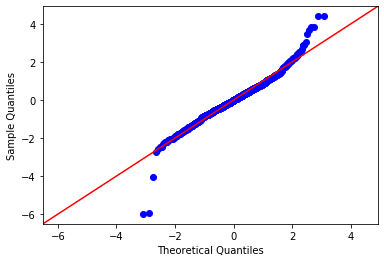

In [22]:
# 학습데이터의 잔차 확인
res=fit_model.resid
# q-q plot # 정규분포 확인
fig = sm.qqplot(res, fit=True, line='45')
## y=x 꼴이어야지 정규성을 뛴다고 할 수 있음
#양 꼬리 부분에서 정규성을 뛰지 않음
##but 일반적으로는 완전히 y=x로 안되기에 이 정도면 괜찬

Text(0, 0.5, 'Residual')

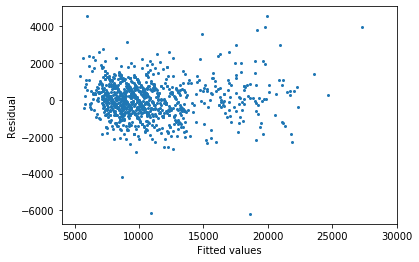

In [23]:
#잔차의 등분산성 검증
# residual pattern 확인
pred_y=fit_model.predict(train_x) #내가 만든 모델로 예측 해 봄

import matplotlib.pyplot as plt
fig = plt.scatter(pred_y,res, s=4)
plt.xlim(4000,30000)
plt.xlim(4000,30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

## 분포가 어떤한 형태를 보이지 않으므로 괜찮

In [24]:
 ## 검증(test) 데이터에 대한 예측 
pred_y2=fit_model.predict(test_x)

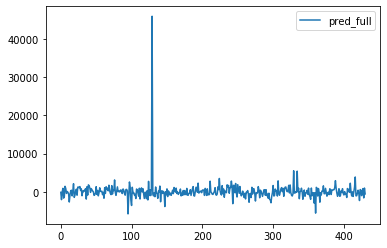

In [25]:
## 잔차 plot
plt.plot(np.array(test_y-pred_y2),label="pred_full")
plt.legend()
plt.show()

##4000을 넘은 데이터 빼고는 다 이 정도면 괜찮음(나쁘지 않음)

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:

## MSE 성능 작을수록 좋음
mean_squared_error(y_true=test_y,y_pred=pred_y2)

6327066.801684529

# 변수선택법

## def processSubset
### train x와y,변수를 받았을 때 그 변수로 만든 모델을 적합 시키고 그 모델의 AIC를 리턴

In [28]:
def processSubset(X,y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
        
print(processSubset(X=train_x, y=train_y, feature_set = feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001765B076400>, 'AIC': 19032.96069461743}


In [29]:
processSubset(X=train_x, y=train_y, feature_set = feature_columns)


{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1765afaafd0>,
 'AIC': 16873.104081290505}

In [30]:
X #train_x

,ABS,Age_08_04,Airbag_1,Airbag_2,Airco,Automatic,Automatic_airco,BOVAG_Guarantee,Backseat_Divider,Boardcomputer,...,Power_Steering,Powered_Windows,Quarterly_Tax,Radio,Radio_cassette,Sport_Model,Tow_Bar,Weight,cc,const
0,1,23,1,1,0,0,0,1,1,1,...,1,1,210,0,0,0,0,1165,2000,1.0
1,1,23,1,1,1,0,0,1,1,1,...,1,0,210,0,0,0,0,1165,2000,1.0
2,1,24,1,1,0,0,0,1,1,1,...,1,0,210,0,0,0,0,1165,2000,1.0
3,1,26,1,1,0,0,0,1,1,1,...,1,0,210,0,0,0,0,1165,2000,1.0
4,1,30,1,1,1,0,0,1,1,1,...,1,1,210,0,0,0,0,1170,2000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1,69,1,1,1,0,0,1,1,0,...,1,1,69,0,0,1,0,1025,1300,1.0
1432,1,72,1,1,0,0,0,1,1,0,...,1,0,69,0,0,1,0,1015,1300,1.0
1433,0,71,1,1,0,0,0,1,1,0,...,1,0,69,0,0,0,0,1015,1300,1.0
1434,0,70,0,0,0,0,0,1,1,0,...,0,0,69,0,0,0,0,1015,1300,1.0


In [31]:
import time
import itertools
# getBest: 가장 낮은 AIC를 가지는 모델 선택 및 저장
#k는 변수의 수
#즉 k=2이면 2개 변수를 뽑는 조합 다 해봄

def getBest(X,y,k):
    tic = time.time() # 시작시간
    results = [] # 결과 저장공간
    for combo in itertools.combinations(X.columns.difference(['const']), k): # 각 변수조합을 고려한 경우의 수
        #상수항을 제외하고 모든 변수의 조합을 고려
        combo=(list(combo)+['const']) #상수항 추가
        
        results.append(processSubset(X,y,feature_set=combo))  # 모델링된 것들을 결과를 result에 저장
        
    models = pd.DataFrame(results) # 데이터 프레임으로 변환 # 여러개의 딕셔너리가든 리스트를 데이터 프레임으로 변경
    print(models) # 확인
    best_model = models.loc[models['AIC'].argmin()] # index # 가장 낮은 AIC를 가지는 모델 선택 및 best_model에 저장
    toc = time.time() # 종료시간
    print("Processed ", models.shape[0], "models on", k, "predictors in", (toc - tic),  "seconds.")
    return best_model



In [32]:
print(getBest(X=train_x, y=train_y,k=2))

                                                 model           AIC
0    <statsmodels.regression.linear_model.Regressio...  17727.463698
1    <statsmodels.regression.linear_model.Regressio...  19193.783974
2    <statsmodels.regression.linear_model.Regressio...  19191.521569
3    <statsmodels.regression.linear_model.Regressio...  19033.960089
4    <statsmodels.regression.linear_model.Regressio...  19188.889199
..                                                 ...           ...
625  <statsmodels.regression.linear_model.Regressio...  18876.964883
626  <statsmodels.regression.linear_model.Regressio...  19216.172091
627  <statsmodels.regression.linear_model.Regressio...  18857.274276
628  <statsmodels.regression.linear_model.Regressio...  19213.838987
629  <statsmodels.regression.linear_model.Regressio...  18801.448719

[630 rows x 2 columns]
Processed  630 models on 2 predictors in 0.9669747352600098 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                 

In [33]:
for combo in itertools.combinations(X.columns.difference(['const']), 2):
    print((list(combo)+['const']))

['ABS', 'Age_08_04', 'const']
['ABS', 'Airbag_1', 'const']
['ABS', 'Airbag_2', 'const']
['ABS', 'Airco', 'const']
['ABS', 'Automatic', 'const']
['ABS', 'Automatic_airco', 'const']
['ABS', 'BOVAG_Guarantee', 'const']
['ABS', 'Backseat_Divider', 'const']
['ABS', 'Boardcomputer', 'const']
['ABS', 'CD_Player', 'const']
['ABS', 'CNG', 'const']
['ABS', 'Central_Lock', 'const']
['ABS', 'Cylinders', 'const']
['ABS', 'Disel', 'const']
['ABS', 'Doors', 'const']
['ABS', 'Gears', 'const']
['ABS', 'Guarantee_Period', 'const']
['ABS', 'HP', 'const']
['ABS', 'KM', 'const']
['ABS', 'Met_Color', 'const']
['ABS', 'Metallic_Rim', 'const']
['ABS', 'Mfg_Month', 'const']
['ABS', 'Mfg_Year', 'const']
['ABS', 'Mfr_Guarantee', 'const']
['ABS', 'Mistlamps', 'const']
['ABS', 'Petrol', 'const']
['ABS', 'Power_Steering', 'const']
['ABS', 'Powered_Windows', 'const']
['ABS', 'Quarterly_Tax', 'const']
['ABS', 'Radio', 'const']
['ABS', 'Radio_cassette', 'const']
['ABS', 'Sport_Model', 'const']
['ABS', 'Tow_Bar', 'cons

### 변수를 하나씩 증가 시켜가면서 좋은 모델을 뽑아 보자!

In [34]:
# 변수 선택에 따른 학습시간과 저장
models = pd.DataFrame(columns=["AIC", "model"]) #빈 데이터 프레임만듬
tic = time.time()
for i in range(1,4):
    models.loc[i] = getBest(X=train_x,y=train_y,k=i)
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

                                                model           AIC
0   <statsmodels.regression.linear_model.Regressio...  19191.825642
1   <statsmodels.regression.linear_model.Regressio...  17751.685762
2   <statsmodels.regression.linear_model.Regressio...  19283.611863
3   <statsmodels.regression.linear_model.Regressio...  19226.720248
4   <statsmodels.regression.linear_model.Regressio...  19082.679299
5   <statsmodels.regression.linear_model.Regressio...  19283.872146
6   <statsmodels.regression.linear_model.Regressio...  18874.164196
7   <statsmodels.regression.linear_model.Regressio...  19288.961204
8   <statsmodels.regression.linear_model.Regressio...  19282.096031
9   <statsmodels.regression.linear_model.Regressio...  18811.933190
10  <statsmodels.regression.linear_model.Regressio...  19023.035730
11  <statsmodels.regression.linear_model.Regressio...  19288.507475
12  <statsmodels.regression.linear_model.Regressio...  19165.187125
13  <statsmodels.regression.linear_model.Regress

In [35]:
models
#변수 3개를 사용하였을 때 가장 AIC가 낮음 

,AIC,model
1,17689.768047,<statsmodels.regression.linear_model.Regressio...
2,17420.427717,<statsmodels.regression.linear_model.Regressio...
3,17293.104976,<statsmodels.regression.linear_model.Regressio...


In [36]:
models.loc[3, "model"].summary()
#R-squared가 높음

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     2108.
Date:                Wed, 03 Jun 2020   Prob (F-statistic):               0.00
Time:                        02:11:29   Log-Likelihood:                -8642.6
No. Observations:                1005   AIC:                         1.729e+04
Df Residuals:                    1001   BIC:                         1.731e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
KM            -0.0220      0.001    -16.154      0.000      -0.025      -0.019
Mfg_Year    1498.3507     37.211     40.266      0.000    1425.330    1571.372
Weight        17.7043      0.926     19.117      0.000      15.887      19.522
const      -3.003e+06   7.39e+04    -40.611      0.000   -3.15e+06   -2.86e+06
==============================================================================
Omnibus:                      176.975   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1982.231
Skew:                          -0.432   Prob(JB):                         0.00
Kurtosis:                       9.826   Cond. No.                     1.40e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
# 모든 변수들 모델링 한것과 비교 
print("full model Rsquared: ","{:.5f}".format(fit_model.rsquared))
print("full model AIC: ","{:.5f}".format(fit_model.aic))
print("full model MSE: ","{:.5f}".format(fit_model.mse_total))
print("selected model Rsquared: ","{:.5f}".format(models.loc[3, "model"].rsquared))
print("selected model AIC: ","{:.5f}".format(models.loc[3, "model"].aic))
print("selected model MSE: ","{:.5f}".format(models.loc[3, "model"].mse_total))

full model Rsquared:  0.91523
full model AIC:  16873.10408
full model MSE:  12640574.70865
selected model Rsquared:  0.86333
selected model AIC:  17293.10498
selected model MSE:  12640574.70865


### 모든 변수 한것보다 R-squared는 0.05정도 낮지만 mse는 

Text(0, 0.5, 'BIC')

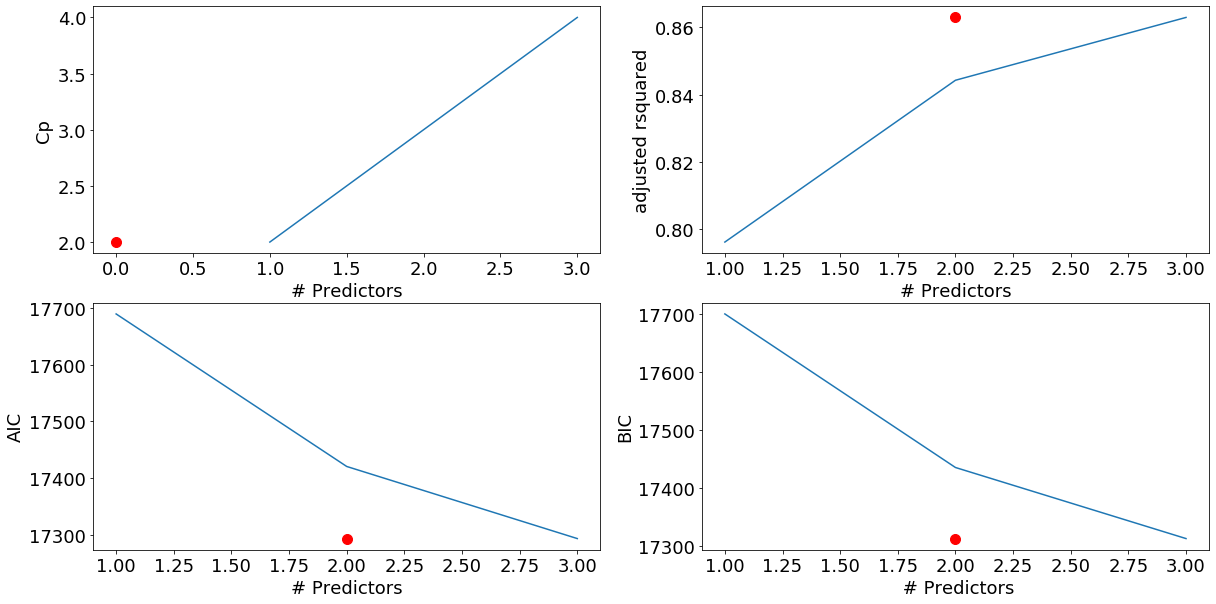

In [38]:
# Plot the result
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

## Mallow Cp ##sse값에 penalty를 준값
plt.subplot(2, 2, 1)
Cp= models.apply(lambda row: (row[1].params.shape[0]+(row[1].mse_total-
                               fit_model.mse_total)*(train_x.shape[0]-
                                row[1].params.shape[0])/fit_model.mse_total
                               ), axis=1)
plt.plot(Cp)
plt.plot(Cp.argmin(), Cp.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('Cp')

# adj-rsquared plot
# adj-rsquared = Explained variation / Total variation
adj_rsquared = models.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(2, 2, 2)
plt.plot(adj_rsquared)
plt.plot(adj_rsquared.argmax(), adj_rsquared.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# aic
aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

# bic
bic = models.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel(' # Predictors')
plt.ylabel('BIC')

# 전진선택법

In [39]:
X #train_data

,ABS,Age_08_04,Airbag_1,Airbag_2,Airco,Automatic,Automatic_airco,BOVAG_Guarantee,Backseat_Divider,Boardcomputer,...,Power_Steering,Powered_Windows,Quarterly_Tax,Radio,Radio_cassette,Sport_Model,Tow_Bar,Weight,cc,const
0,1,23,1,1,0,0,0,1,1,1,...,1,1,210,0,0,0,0,1165,2000,1.0
1,1,23,1,1,1,0,0,1,1,1,...,1,0,210,0,0,0,0,1165,2000,1.0
2,1,24,1,1,0,0,0,1,1,1,...,1,0,210,0,0,0,0,1165,2000,1.0
3,1,26,1,1,0,0,0,1,1,1,...,1,0,210,0,0,0,0,1165,2000,1.0
4,1,30,1,1,1,0,0,1,1,1,...,1,1,210,0,0,0,0,1170,2000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1,69,1,1,1,0,0,1,1,0,...,1,1,69,0,0,1,0,1025,1300,1.0
1432,1,72,1,1,0,0,0,1,1,0,...,1,0,69,0,0,1,0,1015,1300,1.0
1433,0,71,1,1,0,0,0,1,1,0,...,1,0,69,0,0,0,0,1015,1300,1.0
1434,0,70,0,0,0,0,0,1,1,0,...,0,0,69,0,0,0,0,1015,1300,1.0


In [40]:
########전진선택법(step=1)
#ex) 4개 변수 중 하나를 선택하고 다음 변수를 선택할 때 남아있는 3개중 선택 할 변수 찾는 코드 
# 즉 추가할 변수 찾는 코드
def forward(X, y, predictors):#x:train_x,y:train_y,predictors:이미 선택되어진 변수
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const'])) #현재 선택되어있는 변수 + p번째 선택된 변수+상수
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [54]:
#### 전진선택법 모델
#변수를 추가해서 alc가 높아지면 stop
def forward_model(X,y): #x:train_x, y:train_y
    Fmodels = pd.DataFrame(columns=["AIC", "model"]) #빈 데이터 프레임
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors) #forward함수 return: model
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:#이 전(변수3개)과 현재 모델(변수4개)의 alc비교
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names #선택된 모델로 predictors계속 업데이트
        Fmodel_before = Fmodels.loc[i]["AIC"] #Fmodel_before: 이 전에 선택된 모델의 AIC ex) 변수 3개만 alc 현재는 4개 
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])

In [58]:
 Forward_best_model=forward_model(X=train_x, y= train_y)

Processed  36 models on 1 predictors in 0.061834096908569336
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000176083FF320>
Processed  35 models on 2 predictors in 0.057845354080200195
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000176083FF1D0>
Processed  34 models on 3 predictors in 0.06383037567138672
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001760C62A748>
Processed  33 models on 4 predictors in 0.057845115661621094
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001765E801940>
Processed  32 models on 5 predictors in 0.05685091018676758
Selected predictors: ['Mfg_Year', 'Automatic_airco

In [59]:
Forward_best_model.aic

16861.02830267655

In [60]:
Forward_best_model.summary()
#필요없는 변수는 지워짐

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     421.0
Date:                Wed, 03 Jun 2020   Prob (F-statistic):               0.00
Time:                        02:36:47   Log-Likelihood:                -8404.5
No. Observations:                1005   AIC:                         1.686e+04
Df Residuals:                     979   BIC:                         1.699e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1380.9258     46.079     29.969      0.000    1290.501    1471.351
Automatic_airco   2457.0126    179.419     13.694      0.000    2104.923    2809.102
Weight               8.5239      1.219      6.992      0.000       6.132      10.916
KM                  -0.0167      0.001    -13.065      0.000      -0.019      -0.014
Powered_Windows    594.6699    142.886      4.162      0.000     314.273     875.067
HP                  49.9123      5.945      8.396      0.000      38.246      61.579
Mfr_Guarantee      297.3471     73.909      4.023      0.000     152.309     442.385
Guarantee_Period    69.1765     13.571      5.097      0.000      42.544      95.809
Quarterly_Tax        8.7321      2.030      4.301      0.000       4.748      12.717
BOVAG_Guarantee    466.7258    125.083      3.731      0.000     221.264     712.188
Tow_Bar           -194.6073     78.191     -2.489      0.013    -348.049     -41.165
cc                  -3.2211      0.554     -5.814      0.000      -4.308      -2.134
Disel             2137.0677    493.929      4.327      0.000    1167.786    3106.350
Automatic          503.6161    156.811      3.212      0.001     195.892     811.341
Airco              245.1540     89.161      2.750      0.006      70.186     420.123
Sport_Model        284.9482     84.532      3.371      0.001     119.063     450.834
ABS               -287.3138    100.914     -2.847      0.005    -485.347     -89.280
Doors               91.8473     39.705      2.313      0.021      13.930     169.765
CD_Player          292.2698     96.674      3.023      0.003     102.558     481.982
Boardcomputer     -272.8168    117.369     -2.324      0.020    -503.141     -42.493
Mfg_Month           25.2402     10.286      2.454      0.014       5.054      45.426
CNG              -1116.5848    411.905     -2.711      0.007   -1924.903    -308.267
Backseat_Divider  -264.4538    116.550     -2.269      0.023    -493.171     -35.736
Central_Lock      -241.4289    142.230     -1.697      0.090    -520.539      37.681
Metallic_Rim       137.5704     90.533      1.520      0.129     -40.091     315.231
const            -2.761e+06   9.19e+04    -30.042      0.000   -2.94e+06   -2.58e+06
==============================================================================
Omnibus:                       87.364   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              500.586
Skew:                          -0.067   Prob(JB):                    1.99e-109
Kurtosis:                       6.455   Cond. No.                     2.18e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+

# 후진소거법 
### 변수들을 제거 해 나가면서 비교

In [61]:
######## 후진선택법(step=1)
#지울 변수 찾기 지웠을 때 가장 alc가 낮은 모델 반환 
def backward(X,y,predictors):
    tic = time.time()
    results = []
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [62]:
# 후진 소거법 모델
def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))#빈 데이터 프레임
    tic = time.time()
    predictors = X.columns.difference(['const']) #상수항 제거하고 다 넣기
    Bmodel_before = processSubset(X,y,predictors)['AIC'] #모든 변수 집어넣은 모델의 alc
    while (len(predictors) > 1): # 변수가 하나 이상 일 때까지 돌림
        Backward_result = backward(X=train_x, y= train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names #선택되어진(제거된) 모델 업데이트
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])

In [63]:
Backward_best_model = backward_model(X=train_x,y=train_y)

Processed  36 models on 35 predictors in 0.1704881191253662
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Disel', 'Doors', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001760C618C18>
Processed  35 models on 34 predictors in 0.1491382122039795
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Disel', 'Doors', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mf

In [64]:
Backward_best_model.aic

16861.028302676572

# 단계적 선택법(stepwise)
## 전진,후진 번갈아 가면서
### 시간이 좀더 많이 걸림

In [68]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # 포워드
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors) #백워드로 지울거 없는지
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [69]:
Stepwise_best_model=Stepwise_model(X=train_x,y=train_y)

Processed  36 models on 1 predictors in 0.06309866905212402
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001760C618BA8>
forward
Processed  1 models on 0 predictors in 0.0039882659912109375
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001767986E748>
Processed  35 models on 2 predictors in 0.07034420967102051
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001767986E780>
forward
Processed  2 models on 1 predictors in 0.005983591079711914
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001760C639748>
Processed  34 models on 3 predictors in 0.07550311088562012
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'const']  AIC: <statsmodels.regression.linear_mod

Processed  20 models on 17 predictors in 0.044329166412353516
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'Powered_Windows', 'HP', 'Mfr_Guarantee', 'Guarantee_Period', 'Quarterly_Tax', 'BOVAG_Guarantee', 'Tow_Bar', 'cc', 'Disel', 'Automatic', 'Airco', 'Sport_Model', 'ABS', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001760C618C88>
forward
Processed  17 models on 16 predictors in 0.04886937141418457
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'Powered_Windows', 'HP', 'Mfr_Guarantee', 'Guarantee_Period', 'Quarterly_Tax', 'BOVAG_Guarantee', 'cc', 'Disel', 'Automatic', 'Airco', 'Sport_Model', 'ABS', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001767986E908>
Processed  19 models on 18 predictors in 0.05512857437133789
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'Powered_Windows', 'HP', 'Mfr_Guarantee', 'Guarantee_Period', 

Processed  26 models on 25 predictors in 0.09994339942932129
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'Powered_Windows', 'HP', 'Mfr_Guarantee', 'Guarantee_Period', 'Quarterly_Tax', 'BOVAG_Guarantee', 'Tow_Bar', 'cc', 'Disel', 'Automatic', 'Airco', 'Sport_Model', 'ABS', 'Doors', 'CD_Player', 'Boardcomputer', 'Mfg_Month', 'CNG', 'Backseat_Divider', 'Central_Lock', 'Metallic_Rim', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000176798500F0>
backward
Processed  11 models on 26 predictors in 0.039725542068481445
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'Powered_Windows', 'HP', 'Mfr_Guarantee', 'Guarantee_Period', 'Quarterly_Tax', 'BOVAG_Guarantee', 'Tow_Bar', 'cc', 'Disel', 'Automatic', 'Airco', 'Sport_Model', 'ABS', 'Doors', 'CD_Player', 'Boardcomputer', 'Mfg_Month', 'CNG', 'Backseat_Divider', 'Central_Lock', 'Metallic_Rim', 'Petrol', 'const']  AIC: <statsmodels.regression.linear_model.Reg

Processed  26 models on 25 predictors in 0.09442520141601562
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'Powered_Windows', 'HP', 'Mfr_Guarantee', 'Guarantee_Period', 'Quarterly_Tax', 'BOVAG_Guarantee', 'Tow_Bar', 'cc', 'Disel', 'Automatic', 'Airco', 'Sport_Model', 'ABS', 'Doors', 'CD_Player', 'Boardcomputer', 'Mfg_Month', 'CNG', 'Backseat_Divider', 'Central_Lock', 'Metallic_Rim', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001767986DEB8>
backward
Total elapsed time: 4.274369955062866 seconds.


In [70]:
Stepwise_best_model.aic

16861.02830267655

# 성능평가 

In [73]:
# the number of params
#선택 된 변수 갯수
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(26,) (28,) (26,)


In [79]:
Forward_best_model.model.exog_names

['Mfg_Year',
 'Automatic_airco',
 'Weight',
 'KM',
 'Powered_Windows',
 'HP',
 'Mfr_Guarantee',
 'Guarantee_Period',
 'Quarterly_Tax',
 'BOVAG_Guarantee',
 'Tow_Bar',
 'cc',
 'Disel',
 'Automatic',
 'Airco',
 'Sport_Model',
 'ABS',
 'Doors',
 'CD_Player',
 'Boardcomputer',
 'Mfg_Month',
 'CNG',
 'Backseat_Divider',
 'Central_Lock',
 'Metallic_Rim',
 'const']

In [75]:
# 모델에 의해 예측된/추정된 값 <->  test_y
pred_y_full = fit_model.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])#선택된 변수만 가져와서 예측
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [76]:
perf_mat = pd.DataFrame(columns=["ALL", "FORWARD", "BACKWARD", "STEPWISE"],
                        index =['MSE', 'RMSE','MAE', 'MAPE'])

In [81]:
#mape
def mean_absolute_percentage_error(y_true, y_pred): #mse값은 0~무한대로 해셕하기 힘드니 퍼센트 값으로 바꿔주는 함수
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn import metrics

In [82]:
# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y,pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y, pred_y_stepwise)

print(perf_mat)

              ALL      FORWARD     BACKWARD     STEPWISE
MSE   6.32707e+06  6.42188e+06  6.42188e+06  6.42188e+06
RMSE      2515.37      2534.14      2534.14      2534.14
MAE       973.655      969.968      969.968      969.968
MAPE      9.34382      9.31353      9.31353      9.31353


rmse:mse에 루트 씌운거 보기 힘들면 이거 보면됨
mape:mse를 퍼센트로

전체를 다 넣은 것이 rmse가 가장 낮다,그러나 mae,mape는 변수선택법으로 뽑은것이 더 낮다
애매하지만 변수 수가 차이가 많이 나기에
비슷한 성능이면 적은 변수를 선택하는게 best

In [86]:
print(len(fit_model.params))
print(len(Forward_best_model.params))
print(len(Backward_best_model.params))
print(len(Stepwise_best_model.params))


37
26
28
26


1.데이터 전처리(test,train)
2.모델 피팅
3.r-squared나 p-value보고 성능평가
5.다중공선성보고 지울변수 보기
4.변수 선택법으로 필요없는 제거하는 모델 만들어봄
5.residual(잔차)꼭 확인 해야 함-> 잘만들어진 모델의 잔차는 정규분포를 따르기에(잔차의 정규성,독립성,등분산성)
6.모델 선택
